In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
   alpha_1[0]     -1.89      0.11     -1.89     -2.10     -1.75    361.19      1.00
 alpha_chi[0]      1.67      0.46      1.61      1.02      2.27    265.86      1.00
    beta_1[0]      2.09      0.60      2.02      1.15      2.98    492.70      1.00
  beta_chi[0]      3.80      0.75      3.82      2.76      5.00    255.45      1.02
     kappa[0]      0.77      1.13      0.79     -0.92      2.70    306.10      1.00
  mix_tilt[0]      0.51      0.28      0.52      0.13      1.00    383.62      1.00
   mixture[0]      0.04      0.01      0.04      0.02      0.06    215.29      1.00
   mu_peak[0]     30.93      1.21     31.01     29.34     32.86    191.03      1.00
  sig_tilt[0]      1.66      1.17      1.39      0.13      3.48    419.37      1.00
sigma_peak[0]      3.17      1.90      2.62      1.00      5.58    199.60      1.00

Number of divergences: 0


(array([0.02294588, 0.01529725, 0.0305945 , 0.0305945 , 0.16826976,
        0.16062114, 0.20651289, 0.23710739, 0.30594502, 0.37478266,
        0.32124228, 0.32124228, 0.29064777, 0.20651289, 0.13767526,
        0.14532389, 0.0305945 , 0.02294588, 0.01529725, 0.01529725]),
 array([-2.473516  , -2.14665989, -1.81980378, -1.49294768, -1.16609157,
        -0.83923546, -0.51237935, -0.18552325,  0.14133286,  0.46818897,
         0.79504508,  1.12190118,  1.44875729,  1.7756134 ,  2.10246951,
         2.42932562,  2.75618172,  3.08303783,  3.40989394,  3.73675005,
         4.06360615]),
 <BarContainer object of 20 artists>)

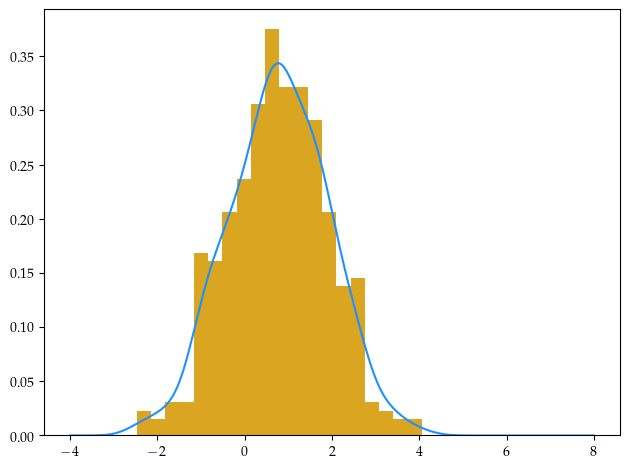

In [7]:
# import scipy gaussian kde
from scipy.stats import gaussian_kde
kde = gaussian_kde(posterior_samples["kappa"].flatten())
x = np.linspace(-4, 8, 1000)
plt.plot(x, kde(x))
plt.hist(posterior_samples["kappa"], bins = 20, density = True)

In [ ]:
from config.mass1d_func import pdb_with_NG
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb_with_NG)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")